# static dielectric constant (ε₀)
ϵ = 0.31 for GaAs

In [1]:
# Original lattice dimensions
xx = 11.5267998335651427
yy = 11.5267998335651427
zz = 11.5267998335651427

# Strain values to apply in the x direction (as a fraction, e.g., 0.01 = 1% strain)
strain = [0.001, 0.0025, 0.0035, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025]

# Poisson ratio for the material (change if needed)
nu = 0.31

print("Strain   xx_new         yy_new         zz_new")
print("------------------------------------------------")
for eps_x in strain:
    # Apply the direct strain in the x-direction
    xx_new = xx * (1 + eps_x)
    # The material contracts in y and z directions due to the Poisson effect
    yy_new = yy * (1 - nu * eps_x)
    zz_new = zz * (1 - nu * eps_x)
    
    print(f"{eps_x}   {xx_new}   {yy_new}   {zz_new}")

Strain   xx_new         yy_new         zz_new
------------------------------------------------
0.001   11.538326633398707   11.523226525616737   11.523226525616737
0.0025   11.555616833149054   11.51786656369413   11.51786656369413
0.0035   11.56714363298262   11.514293255745725   11.514293255745725
0.005   11.584433832732968   11.508933293823116   11.508933293823116
0.0075   11.613250832316883   11.500000023952104   11.500000023952104
0.01   11.642067831900794   11.491066754081091   11.491066754081091
0.0125   11.670884831484706   11.482133484210078   11.482133484210078
0.015   11.69970183106862   11.473200214339064   11.473200214339064
0.0175   11.728518830652533   11.464266944468053   11.464266944468053
0.02   11.757335830236446   11.455333674597039   11.455333674597039
0.0225   11.786152829820358   11.446400404726026   11.446400404726026
0.025   11.814969829404271   11.437467134855012   11.437467134855012


Processing file: VISE_Poisson\OUTCAR_0.00
Processing file: VISE_Poisson\OUTCAR_0.10
Processing file: VISE_Poisson\OUTCAR_0.25
Processing file: VISE_Poisson\OUTCAR_0.35
Processing file: VISE_Poisson\OUTCAR_0.50
Processing file: VISE_Poisson\OUTCAR_0.75
Processing file: VISE_Poisson\OUTCAR_1.00
Processing file: VISE_Poisson\OUTCAR_1.25
Processing file: VISE_Poisson\OUTCAR_1.50
Processing file: VISE_Poisson\OUTCAR_1.75
Processing file: VISE_Poisson\OUTCAR_2.00
Processing file: VISE_Poisson\OUTCAR_2.25
Processing file: VISE_Poisson\OUTCAR_2.50


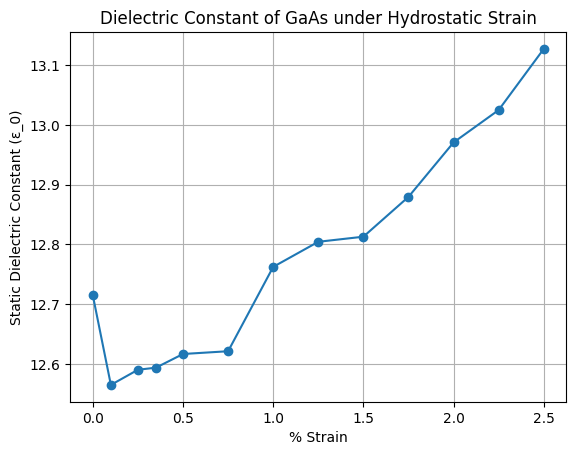

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# List of OUTCAR files ( filenames OUTCAR_0, OUTCAR_50, etc.)
outcar_files = sorted(glob.glob("VISE_Poisson/OUTCAR_*"))

dielectric_constants = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        data_real = []
        energy_array = []

        print(f"Processing file: {file}")

        # Read Real Dielectric Function
        found_real = False
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                found_real = True
                next(OUTCAR)  # Skip column header line
                next(OUTCAR)  # Skip separator line
                break

        if not found_real:
            print(f"Warning: REAL dielectric function not found in {file}")
            continue

        # Read the dielectric function values
        for line in OUTCAR:
            if line.strip() == "":  # Stop when an empty line is reached
                break
            values = line.split()
            energy_array.append(float(values[0]))  # Energy (eV)
            data_real.append(float(values[1]))  # ε_xx (first principal component)

        # Convert to NumPy arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)

        if len(data_real) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue  # Skip this file

        # Static dielectric constant = ε_xx at lowest frequency (~0 eV)
        epsilon_static = data_real[0]  
        dielectric_constants.append(epsilon_static)

# Define corresponding PSTRESS values (Modify if filenames differntt)
pstress_values = [0.00, 0.10, 0.25, 0.35, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50]  # %

# Check if any data was collected before plotting
if not dielectric_constants:
    print("No valid dielectric constants extracted. Check OUTCAR files.")
else:
    # Plot dielectric constant vs. PSTRESS
    plt.plot(pstress_values, dielectric_constants, marker='o', linestyle='-')
    plt.xlabel("% Strain")
    plt.ylabel("Static Dielectric Constant (ε_0)")
    plt.title("Dielectric Constant of GaAs under Hydrostatic Strain")
    plt.grid(True)
    plt.show()

# full dielectric function vs. photon energy for different strains.

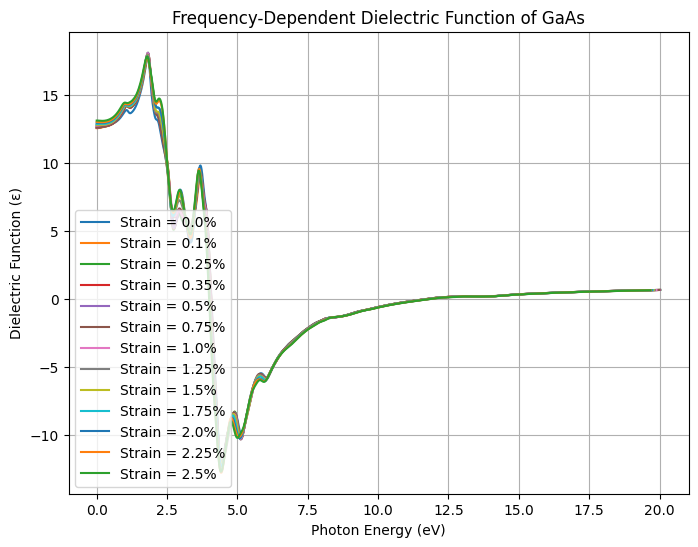

In [3]:
all_frequencies = []
all_dielectrics = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []

        # Locate the real dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                next(OUTCAR)  # Skip column header
                next(OUTCAR)  # Skip separator
                break

        # Read dielectric function data
        for line in OUTCAR:
            if line.strip() == "":  # Stop at empty line
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])  # Energy (eV)
            data_real.append(values[1])  # ε_xx

        # Convert to arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)

        if len(data_real) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue

        # Store results
        all_frequencies.append(energy_array)
        all_dielectrics.append(data_real)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_frequencies[i], all_dielectrics[i], label=f"Strain = {pstress}%")

plt.xlabel("Photon Energy (eV)")
plt.ylabel("Dielectric Function (ε)")
plt.title("Frequency-Dependent Dielectric Function of GaAs")
plt.legend()
plt.grid(True)
plt.show()

# Frequency-Dependent Refractive Index of GaAs or different strains.

C:\Users\Jafet\AppData\Local\Temp\ipykernel_11104\2155889490.py:43: RuntimeWarning: divide by zero encountered in divide
  wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm


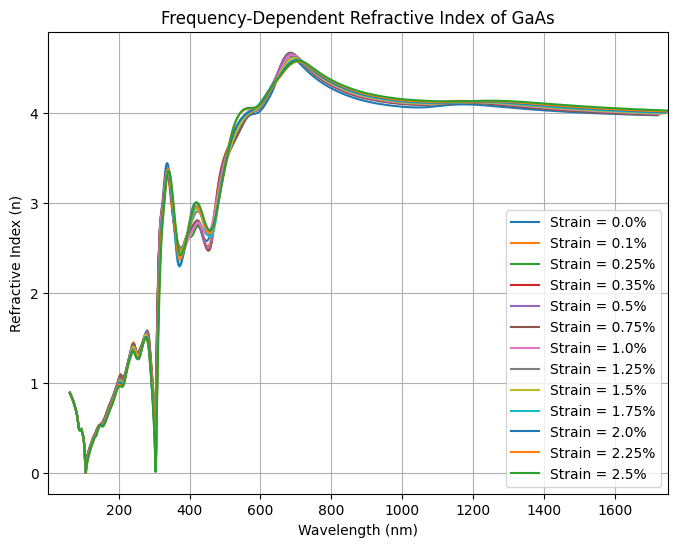

In [9]:
import numpy as np
import matplotlib.pyplot as plt


h = 4.135667696e-15
c = 2.99792458e8

all_wavelengths = []
all_refractive_indices = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []
        data_img = []

        # Locate the real and imaginary dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                next(OUTCAR)  # Skip column header
                next(OUTCAR)  # Skip separator
                break

        # Read dielectric function data (real part)
        for line in OUTCAR:
            if line.strip() == "":
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])   # Energy (eV)
            data_real.append(values[1])      # ε_xx real part
            data_img.append(values[2])       # ε_xx imaginary part

        # Omzetten naar arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)
        data_img = np.array(data_img)

        if len(data_real) == 0 or len(data_img) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue
        
        # Energie omzetten naar golflengte (in nm)
        wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm

        # Brekingsindex berekenen met aangepaste formule
        refractive_index_array = np.sqrt((np.sqrt(data_real**2 + data_img**2) + data_real) / 2)

        # Beperk golflengte tot bereik 300 nm - 1200 nm
        mask = (wavelength_array >= 1) & (wavelength_array <= 1750)
        wavelength_array = wavelength_array[mask]
        refractive_index_array = refractive_index_array[mask]

        all_wavelengths.append(wavelength_array)
        all_refractive_indices.append(refractive_index_array)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_wavelengths[i], all_refractive_indices[i], label=f"Strain = {pstress}%")

plt.xlim(1, 1750)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Refractive Index (n)")
plt.title("Frequency-Dependent Refractive Index of GaAs")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Jafet\AppData\Local\Temp\ipykernel_11104\3446593659.py:43: RuntimeWarning: divide by zero encountered in divide
  wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm


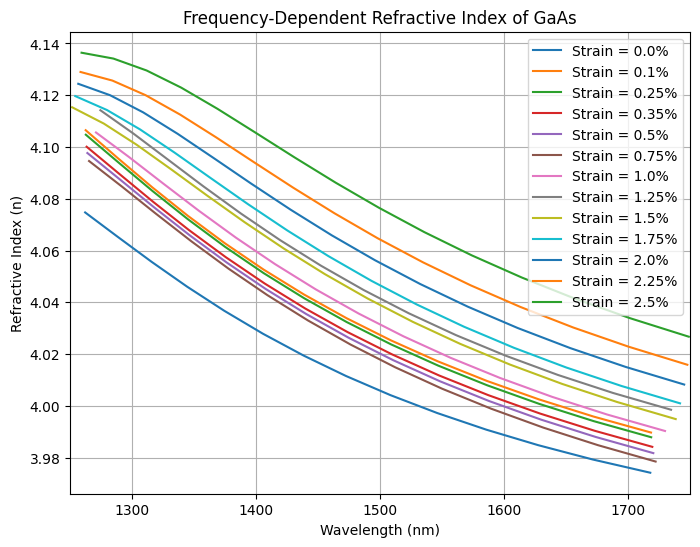

C:\Users\Jafet\AppData\Local\Temp\ipykernel_11104\2828999377.py:43: RuntimeWarning: divide by zero encountered in divide
  wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm


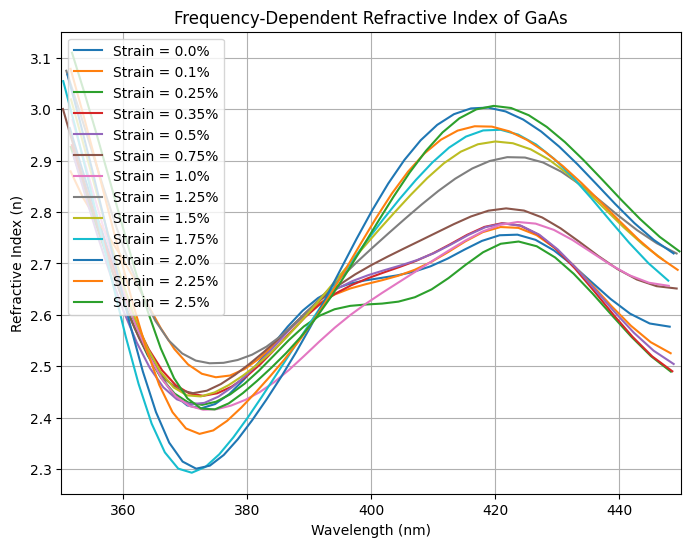

In [12]:
import numpy as np
import matplotlib.pyplot as plt


h = 4.135667696e-15
c = 2.99792458e8

all_wavelengths = []
all_refractive_indices = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []
        data_img = []

        # Locate the real and imaginary dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                next(OUTCAR)  # Skip column header
                next(OUTCAR)  # Skip separator
                break

        # Read dielectric function data (real part)
        for line in OUTCAR:
            if line.strip() == "":
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])   # Energy (eV)
            data_real.append(values[1])      # ε_xx real part
            data_img.append(values[2])       # ε_xx imaginary part

        # Omzetten naar arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)
        data_img = np.array(data_img)

        if len(data_real) == 0 or len(data_img) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue
        
        # Energie omzetten naar golflengte (in nm)
        wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm

        # Brekingsindex berekenen met aangepaste formule
        refractive_index_array = np.sqrt((np.sqrt(data_real**2 + data_img**2) + data_real) / 2)

        # Beperk golflengte tot bereik 300 nm - 1200 nm
        mask = (wavelength_array >= 350) & (wavelength_array <= 450)
        wavelength_array = wavelength_array[mask]
        refractive_index_array = refractive_index_array[mask]

        all_wavelengths.append(wavelength_array)
        all_refractive_indices.append(refractive_index_array)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_wavelengths[i], all_refractive_indices[i], label=f"Strain = {pstress}%")

plt.xlim(350, 450)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Refractive Index (n)")
plt.title("Frequency-Dependent Refractive Index of GaAs")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Jafet\AppData\Local\Temp\ipykernel_11104\3446593659.py:43: RuntimeWarning: divide by zero encountered in divide
  wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm


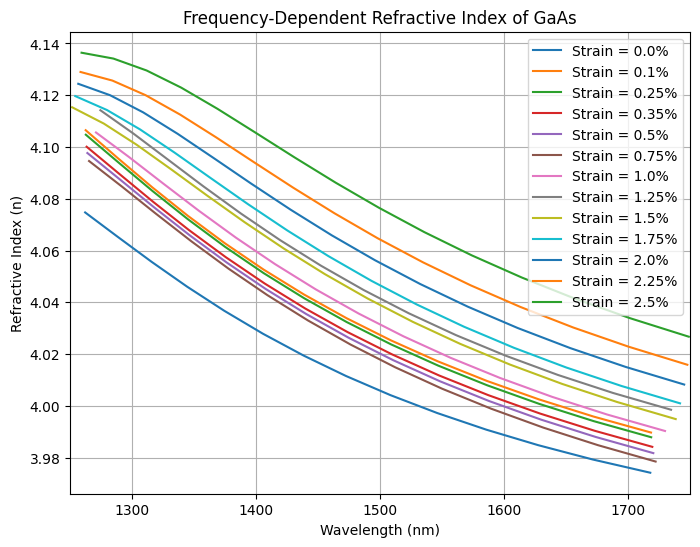

In [10]:
import numpy as np
import matplotlib.pyplot as plt


h = 4.135667696e-15
c = 2.99792458e8

all_wavelengths = []
all_refractive_indices = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []
        data_img = []

        # Locate the real and imaginary dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                next(OUTCAR)  # Skip column header
                next(OUTCAR)  # Skip separator
                break

        # Read dielectric function data (real part)
        for line in OUTCAR:
            if line.strip() == "":
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])   # Energy (eV)
            data_real.append(values[1])      # ε_xx real part
            data_img.append(values[2])       # ε_xx imaginary part

        # Omzetten naar arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)
        data_img = np.array(data_img)

        if len(data_real) == 0 or len(data_img) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue
        
        # Energie omzetten naar golflengte (in nm)
        wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm

        # Brekingsindex berekenen met aangepaste formule
        refractive_index_array = np.sqrt((np.sqrt(data_real**2 + data_img**2) + data_real) / 2)

        # Beperk golflengte tot bereik 300 nm - 1200 nm
        mask = (wavelength_array >= 1250) & (wavelength_array <= 1750)
        wavelength_array = wavelength_array[mask]
        refractive_index_array = refractive_index_array[mask]

        all_wavelengths.append(wavelength_array)
        all_refractive_indices.append(refractive_index_array)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_wavelengths[i], all_refractive_indices[i], label=f"Strain = {pstress}%")

plt.xlim(1250, 1750)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Refractive Index (n)")
plt.title("Frequency-Dependent Refractive Index of GaAs")
plt.legend()
plt.grid(True)
plt.show()

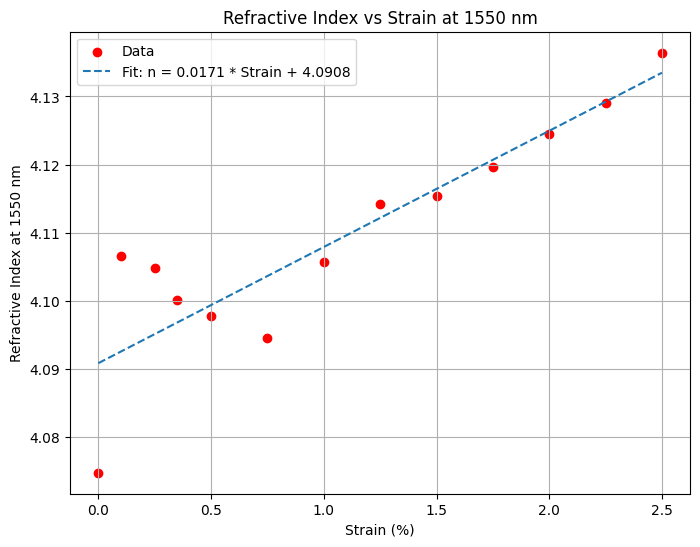

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extract refractive index at 1550 nm for each strain
target_wavelength = 1550
n_at_1550 = []

for wavelengths, refractive_indices in zip(all_wavelengths, all_refractive_indices):
    if target_wavelength < min(wavelengths) or target_wavelength > max(wavelengths):
        print("Warning: 1550 nm is outside the interpolation range.")
        continue
    # Interpolate to find n at 1550 nm
    n_at_1550.append(np.interp(target_wavelength, wavelengths, refractive_indices))

#linear fit (small)
def linear_fit(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_fit, pstress_values, n_at_1550)
strain_smooth = np.linspace(min(pstress_values), max(pstress_values), 100)
n_smooth = linear_fit(strain_smooth, *popt)

plt.figure(figsize=(8, 6))
plt.scatter(pstress_values, n_at_1550, label="Data", color='r')
plt.plot(strain_smooth, n_smooth, label=f"Fit: n = {popt[0]:.4f} * Strain + {popt[1]:.4f}", linestyle="--")
plt.xlabel("Strain (%)")
plt.ylabel("Refractive Index at 1550 nm")
plt.title("Refractive Index vs Strain at 1550 nm")
plt.legend()
plt.grid(True)
plt.show()